In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

np.set_printoptions(suppress=True)
np.random.seed(666)

In [2]:
dataset = pd.read_csv('data.csv', sep='\t', header=None, names=['X1', 'X2', 'label'])
dataset.head()
dataset.describe()

,X1,X2,label
count,100.000000,100.000000,100.000000
mean,0.030012,6.576110,0.530000
std,1.170337,4.644942,0.501614
min,-3.642001,-3.181888,0.000000
25%,-0.790164,2.828881,0.000000
50%,0.083975,6.893569,1.000000
75%,0.834009,10.458066,1.000000
max,3.010150,14.739025,1.000000


In [3]:
x = dataset[['X1','X2']]
y = dataset['label']

0.32751521175918274
批量梯度下降算法耗时： 0.16390514373779297
迭代到第733次，结束迭代！


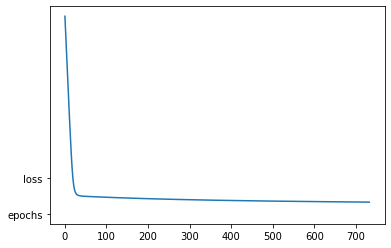

0.4760056878452796
随机梯度下降算法耗时： 0.015990018844604492
迭代到第56次，结束迭代！


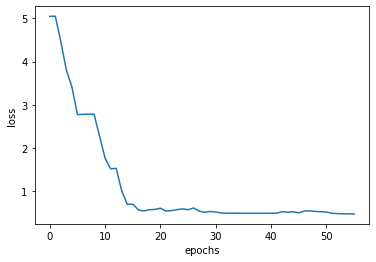

0.4150630470435959
小批量梯度下降算法耗时： 0.23586320877075195
迭代到第224次，结束迭代！


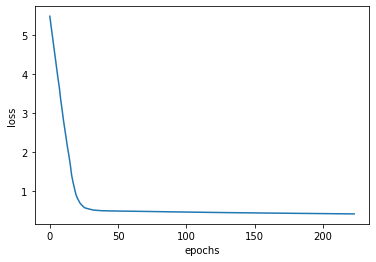

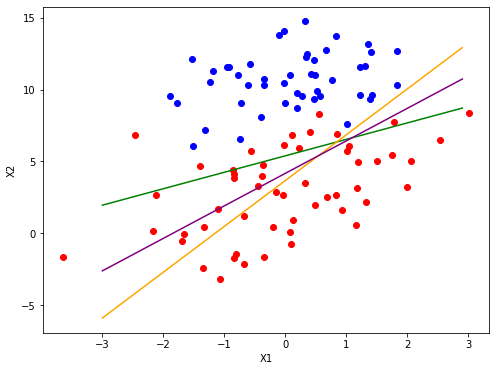

[[ 0.38533462]
 [-0.3364678 ]
 [ 1.81436228]] [[ 0.85108936]
 [-0.26689384]
 [ 0.98040536]] [[ 0.66322836]
 [-0.29314891]
 [ 1.22363646]]


In [15]:
def sigmoid(inX):
    return 1.0 / (1 + np.exp(-inX))

def cost(dataMatrix, weights, labelMatrix, lmd):
    m, n = dataMatrix.shape
    y_hat = sigmoid(dataMatrix.dot(weights))
    c = (-1.0/m) * np.sum(labelMatrix * np.log(y_hat) + (1 - labelMatrix) * np.log(1 - y_hat)) + (lmd/(2*m)) * np.sum(weights.T.dot(weights))
    return c

def gradDescent(dataMat, labelMat, alpha=0.01, maxepochs=500, epsilion=1e-4, lmd=1):
    dataMatrix = np.array(dataMat)
    labelMatrix = np.array(labelMat).reshape((-1,1))
    m, n = dataMatrix.shape
    bias_column = np.array([1 for i in range(m)])
    dataMatrix = np.column_stack((dataMatrix, bias_column))
    m, n = dataMatrix.shape
    weights = np.ones((n, 1))
    epoch_count = 0
    loss_list = []
    epoch_list = []
    starttime = time.time()
    while epoch_count < maxepochs:
        loss = cost(dataMatrix, weights, labelMatrix, lmd)
        y_hat = sigmoid(dataMatrix.dot(weights))
        error = labelMatrix- y_hat
        last_weights = weights
        normal_gradient = -(1.0/m) * dataMatrix.T.dot(error)
        gradient = normal_gradient[:-1] + (1.0/m) * lmd * weights[:-1]
        gradient = np.row_stack((gradient, normal_gradient[-1]))
        weights = last_weights - alpha * gradient
        loss_new = cost(dataMatrix, weights, labelMatrix, lmd)
        if abs(loss_new - loss) < epsilion:
            break
        loss_list.append(loss_new)
        epoch_list.append(epoch_count)
        epoch_count += 1
    print(loss_new)
    print("批量梯度下降算法耗时：", time.time() - starttime)
    print('迭代到第{}次，结束迭代！'.format(epoch_count))
    plt.plot(epoch_list, loss_list)
    plt.plot('epochs')
    plt.plot('loss')
    plt.show()
    return weights

def sGradientDescent(dataMat, labelMat, alpha=0.01, maxepochs=500, epsilion=1e-4, lmb=1):
    dataMatrix = np.array(x)
    m, n = dataMat.shape
    bias_column = [1 for i in range(m)]
    dataMatrix = np.column_stack((dataMatrix, bias_column))
    labelMatrix = np.array(y)
    labelMatrix = labelMatrix.reshape((-1, 1))
    m, n = dataMatrix.shape
    weights = np.ones((n, 1))
    epoch_count = 0
    loss_list = []
    epoch_list = []
    starttime = time.time()
    while epoch_count < maxepochs:
        rand_i = np.random.randint(m)
        loss = cost(dataMatrix, weights, labelMatrix, lmb)
        y_hat = sigmoid(dataMatrix[rand_i, :].dot(weights))
        error = labelMatrix[rand_i] - y_hat
        normal_gradient = -dataMatrix[rand_i, :].reshape(-1, 1).dot(error.reshape(-1, 1))
        gradient = normal_gradient[:-1] + (1.0/m) * lmb * weights[:-1]
        gradient = np.row_stack((gradient, normal_gradient[-1]))
        weights = weights - alpha * gradient
        loss_new = cost(dataMatrix, weights, labelMatrix, lmb)
        if abs(loss_new - loss) < epsilion:
            break
        loss_list.append(loss_new)
        epoch_list.append(epoch_count)
        epoch_count += 1
    print(loss_new)
    print("随机梯度下降算法耗时：", time.time() - starttime)
    print('迭代到第{}次，结束迭代！'.format(epoch_count))
    plt.plot(epoch_list, loss_list)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.show()
    return weights

def mBGradDescent(dataMat, labelMat, alpha=0.01, batch_size=10, maxepochs=500, epsilion=1e-4, lmb=1):
    dataMatrix = np.array(dataMat)
    m, n = dataMatrix.shape
    bias_column = [1 for i in range(m)]
    dataMatrix = np.column_stack((dataMatrix, bias_column))
    labelMatrix = np.array(labelMat).reshape(-1, 1)
    m, n = dataMatrix.shape
    weights = np.ones((n, 1))
    epoch_count = 0
    loss_list = []
    epoch_list = []
    starttime = time.time()
    while epoch_count < maxepochs:
        loss = cost(dataMatrix, weights, labelMatrix, lmb)
        rand_indexes = np.random.choice(range(m), batch_size, replace=False) #参数replace 用来设置是否可以取相同元素：True表示可以取相同数字；False表示不可以取相同数字。默认是True
        y_hat = sigmoid(dataMatrix[rand_indexes].dot(weights))
        error = labelMatrix[rand_indexes] - y_hat
        normal_gradient = (-1.0/batch_size) * dataMatrix[rand_indexes].T.dot(error)
        gradient = normal_gradient[:-1] + (1.0/m) * lmb * weights[:-1]
        gradient = np.row_stack((gradient, normal_gradient[-1]))
        weights = weights - alpha * gradient
        loss_new = cost(dataMatrix, weights, labelMatrix, lmb)
        if abs(loss_new - loss) < epsilion:
            break
        loss_list.append(loss_new)
        epoch_list.append(epoch_count)
        epoch_count += 1
    print(loss_new)
    print("小批量梯度下降算法耗时：", time.time() - starttime)
    print('迭代到第{}次，结束迭代！'.format(epoch_count))
    plt.plot(epoch_list, loss_list)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.show()
    return weights
    
        
def plotBsetFit(gd_weights, sgd_weights, mbgd_weights):
    x1_positive, x1_negative = [], []
    x2_positive, x2_negative = [], []
    m, n = x.shape
    dataMatrix = np.array(x)
    labelMatrix = np.array(y)
    for i in range(m):
        if labelMatrix[i] == 1:
            x1_positive.append(dataMatrix[i][0])
            x2_positive.append(dataMatrix[i][1])
        else:
            x1_negative.append(dataMatrix[i][0])
            x2_negative.append(dataMatrix[i][1])
    plt.figure(figsize=(8, 6))
    plt.plot(x1_positive, x2_positive, 'ro')
    plt.plot(x1_negative, x2_negative, 'bo')
    x_range = np.arange(-3.0, 3.0, 0.1)
    y_range = (-gd_weights[2] - gd_weights[0] * x_range) /gd_weights[1]
    y_range_sgd = (-sgd_weights[2] - sgd_weights[0] * x_range) /sgd_weights[1]
    mbgd_weights = (-mbgd_weights[2] - mbgd_weights[0] * x_range) /mbgd_weights[1]
    plt.plot(x_range, y_range, color='g')
    plt.plot(x_range, y_range_sgd, color = 'orange')
    plt.plot(x_range, mbgd_weights, color = 'purple')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

def main():
    gd_weights = gradDescent(x, y, maxepochs=1000, lmd=0.1)
    sgd_weights = sGradientDescent(x, y, maxepochs=1000, lmb=0.1)
    mbgd_weights = mBGradDescent(x, y, batch_size=50, maxepochs=1000, lmb=0.1)
    plotBsetFit(gd_weights, sgd_weights, mbgd_weights)
    print(gd_weights, sgd_weights, mbgd_weights)

if __name__=='__main__':
    main()